# SECTION 1 : CADRE GÉNÉRAL ET OBJECTIFS DE L’ÉTUDE



================================================================

## ANALYSE DES CAMPAGNES DE VACCINATION  
**Gouvernorat de Sousse (2017–2020)**

================================================================

##  Contexte

Les maladies animales contagieuses représentent une menace majeure pour  
l’élevage, l’économie agricole et la santé publique en Tunisie. Afin de  
prévenir la propagation de ces maladies et de protéger le cheptel national,  
des campagnes de vaccination sont organisées chaque année par les services  
vétérinaires du **Gouvernorat de Sousse**.

Ce projet s’inscrit dans une démarche d’analyse des données relatives aux  
campagnes de vaccination menées entre **2017 et 2020**, couvrant plusieurs  
maladies animales majeures telles que :

- la **rage**  
- la **fièvre aphteuse**  
- la **clavelée**  
- la **fièvre catarrhale ovine (Blue Tongue)**  

---

##  Objectifs

### Objectif général

Évaluer l’efficacité et la performance des campagnes de vaccination animale  
réalisées dans le Gouvernorat de Sousse sur la période **2017–2020**.

### Objectifs spécifiques

- Analyser l’évolution temporelle des campagnes de vaccination entre 2017 et 2020.  
- Mesurer et comparer les **taux de couverture vaccinale** selon :
  - l’année,
  - la campagne de vaccination,
  - l’espèce animale ciblée.
- Évaluer l’écart entre les **objectifs programmés** et les **réalisations effectives**  
  en termes de nombre d’animaux vaccinés.
- Classer les campagnes selon leur **niveau d’efficacité** :
  - Excellente  
  - Bonne  
  - Moyenne  
  - Faible
- Identifier les campagnes et espèces présentant des performances faibles  
  nécessitant des actions correctives.
- Vérifier statistiquement si les taux de couverture diffèrent  
  significativement d’une année à l’autre.
- Étudier la relation entre le nombre d’animaux programmés et le nombre  
  réellement vaccinés à l’aide d’un **modèle de régression linéaire**.
- Fournir des éléments d’aide à la décision pour améliorer la planification  
  et l’efficacité des futures campagnes de vaccination.

---

##  Données utilisées

- **Source** : Catalogue Open Data Tunisie (CRDA Sousse)  
- **Période** : 2017–2020  
- **Nombre d’observations** : 44  
- **Nombre de variables** : 7  

### Campagnes étudiées

- Rage  
- Fièvre aphteuse  
- Clavelée  
- Blue Tongue  




# SECTION 2 : DATA EXPLORATION

In [ ]:

# --- 2.1 Chargement des bibliothèques ---
print("2.1 Chargement des bibliothèques...\n")
# Install 'ggthemes' package if not already installed
if (!requireNamespace("ggthemes", quietly = TRUE)) {
  install.packages("ggthemes")
}
suppressPackageStartupMessages({
  library(tidyverse)
  library(ggthemes)
  library(scales)
  library(readxl)
})
print("✓ Bibliothèques chargées avec succès\n\n")


[1] "2.1 Chargement des bibliothèques...\n"
[1] "✓ Bibliothèques chargées avec succès\n\n"


In [15]:
# --- 2.2 Importation des données ---
data_sousse <- read_excel("Data/campagnes-de-vaccination-2017-2020.xlsx")


In [16]:

print(paste("Dimensions du dataset :", nrow(data_sousse), "lignes,", ncol(data_sousse), "colonnes\n"))
# --- 2.3 Structure des données ---
str(data_sousse)


[1] "Dimensions du dataset : 44 lignes, 7 colonnes\n"
tibble [44 × 7] (S3: tbl_df/tbl/data.frame)
 $ annee                    : num [1:44] 2017 2017 2017 2017 2017 ...
 $ Campagne_de_vaccination  : chr [1:44] "La rage" "La rage" "La rage" "La rage" ...
 $ Espece_animale           : chr [1:44] "chiens" "chats" "camelins" "équins" ...
 $ nombre_animaux_programmes: num [1:44] 23750 2000 425 275 250 ...
 $ nombre_animaux_vaccines  : num [1:44] 23942 711 360 257 241 ...
 $ nombre_de_proprietaires  : num [1:44] 11880 450 69 93 1 ...
 $ taux_de_ couverture      : num [1:44] 100 35.5 84.7 93.5 96.4 ...


In [17]:
print(head(data_sousse, 5))

# A tibble: 5 × 7
  annee Campagne_de_vaccination Espece_animale nombre_animaux_programmes
  <dbl> <chr>                   <chr>                              <dbl>
1  2017 La rage                 chiens                             23750
2  2017 La rage                 chats                               2000
3  2017 La rage                 camelins                             425
4  2017 La rage                 équins                               275
5  2017 La rage                 bovins                               250
# ℹ 3 more variables: nombre_animaux_vaccines <dbl>,
#   nombre_de_proprietaires <dbl>, `taux_de_ couverture` <dbl>


In [18]:
# --- 2.5 Vérification des valeurs manquantes ---
cat("2.5 Vérification des valeurs manquantes :\n")
na_count <- colSums(is.na(data_sousse))
print(na_count)
cat("Total de valeurs manquantes :", sum(na_count), "\n\n")

2.5 Vérification des valeurs manquantes :
                    annee   Campagne_de_vaccination            Espece_animale 
                        0                         0                         0 
nombre_animaux_programmes   nombre_animaux_vaccines   nombre_de_proprietaires 
                        0                         0                         0 
      taux_de_ couverture 
                        0 
Total de valeurs manquantes : 0 



In [20]:
# --- 2.6 Nettoyage et création de nouvelles variables ---
data_clean <- data_sousse %>%

  mutate(
    ## CONVERSION EN FACTEURS (CATÉGORISATION)
    # Conversion de l'année en facteur pour traitement comme variable catégorielle
    annee = as.factor(annee),
    
    #  regrouper les donnees par campagne 
    Campagne_de_vaccination = as.factor(Campagne_de_vaccination),
    
    # Conversion de l'espèce animale en facteur
    # Essentiel pour analyser les performances par espèce (chiens, chats, camelins, etc.)
    Espece_animale = as.factor(Espece_animale),


    ## NOUVELLES VARIABLES CALCULÉES
    # Calcul du taux de couverture à partir des données brutes
    taux_calcule = (nombre_animaux_vaccines / nombre_animaux_programmes) * 100,
    
    
    ecart = nombre_animaux_vaccines - nombre_animaux_programmes,
    
    # pourcentage, l’importance du dépassement par rapport aux objectifs fixés
    ecart_pourcent = (ecart / nombre_animaux_programmes) * 100,

     
    ## CATÉGORISATION DE L'EFFICACITÉ 
    
    efficacite = case_when(
      `taux_de_ couverture` >= 90 ~ "Excellente",
      `taux_de_ couverture` >= 75 ~ "Bonne",
      `taux_de_ couverture` >= 50 ~ "Moyenne",      
      # Taux < 50% 
      TRUE ~ "Faible"
    ),
    efficacite = factor(efficacite, levels = c("Excellente", "Bonne", "Moyenne", "Faible"))
  )

# Message de confirmation
cat(" Variables créées : taux_calcule, ecart, ecart_pourcent, efficacite\n\n")


 Variables créées : taux_calcule, ecart, ecart_pourcent, efficacite



In [77]:
# --- 2.7 Statistiques descriptives ---
# Résumé des variables numériques principales
summary(data_clean %>% 
        select(nombre_animaux_programmes, nombre_animaux_vaccines, `taux_de_ couverture`))

# Distribution des campagnes
cat("\nDistribution des campagnes :\n")
print(table(data_clean$Campagne_de_vaccination))

# Distribution des espèces
cat("\nDistribution des espèces :\n")
print(table(data_clean$Espece_animale))

# Distribution par niveau d'efficacité
cat("\nDistribution par niveau d'efficacité :\n")
print(table(data_clean$efficacite))

 nombre_animaux_programmes nombre_animaux_vaccines taux_de_ couverture
 Min.   :     0.0          Min.   :     0          Min.   :  0.00     
 1st Qu.:   481.2          1st Qu.:   360          1st Qu.: 81.25     
 Median : 11000.0          Median :  1224          Median : 90.60     
 Mean   : 80696.0          Mean   : 59606          Mean   : 79.44     
 3rd Qu.: 92500.0          3rd Qu.: 27131          3rd Qu.:100.00     
 Max.   :320000.0          Max.   :316098          Max.   :100.00     


Distribution des campagnes :

   Blue tongue       Clavelée Fièvre afteuse        La rage 
             4              8             12             20 

Distribution des espèces :

  bovins camelins  caprins    chats   chiens   équins    ovins 
       8        8        4        4        4        4       12 

Distribution par niveau d'efficacité :

Excellente      Bonne    Moyenne     Faible 
        23         12          1          8 


# SECTION 3 : VISUALISATION DES DONNÉES

[1] "GRAPHIQUE 1 : Line Chart (Courbe d'évolution)\n"
[1] "Objectif : Visualiser l'évolution du nombre total de vaccinations par campagne sur 4 ans\n"
[1] "Type : Line plot avec points\n\n"


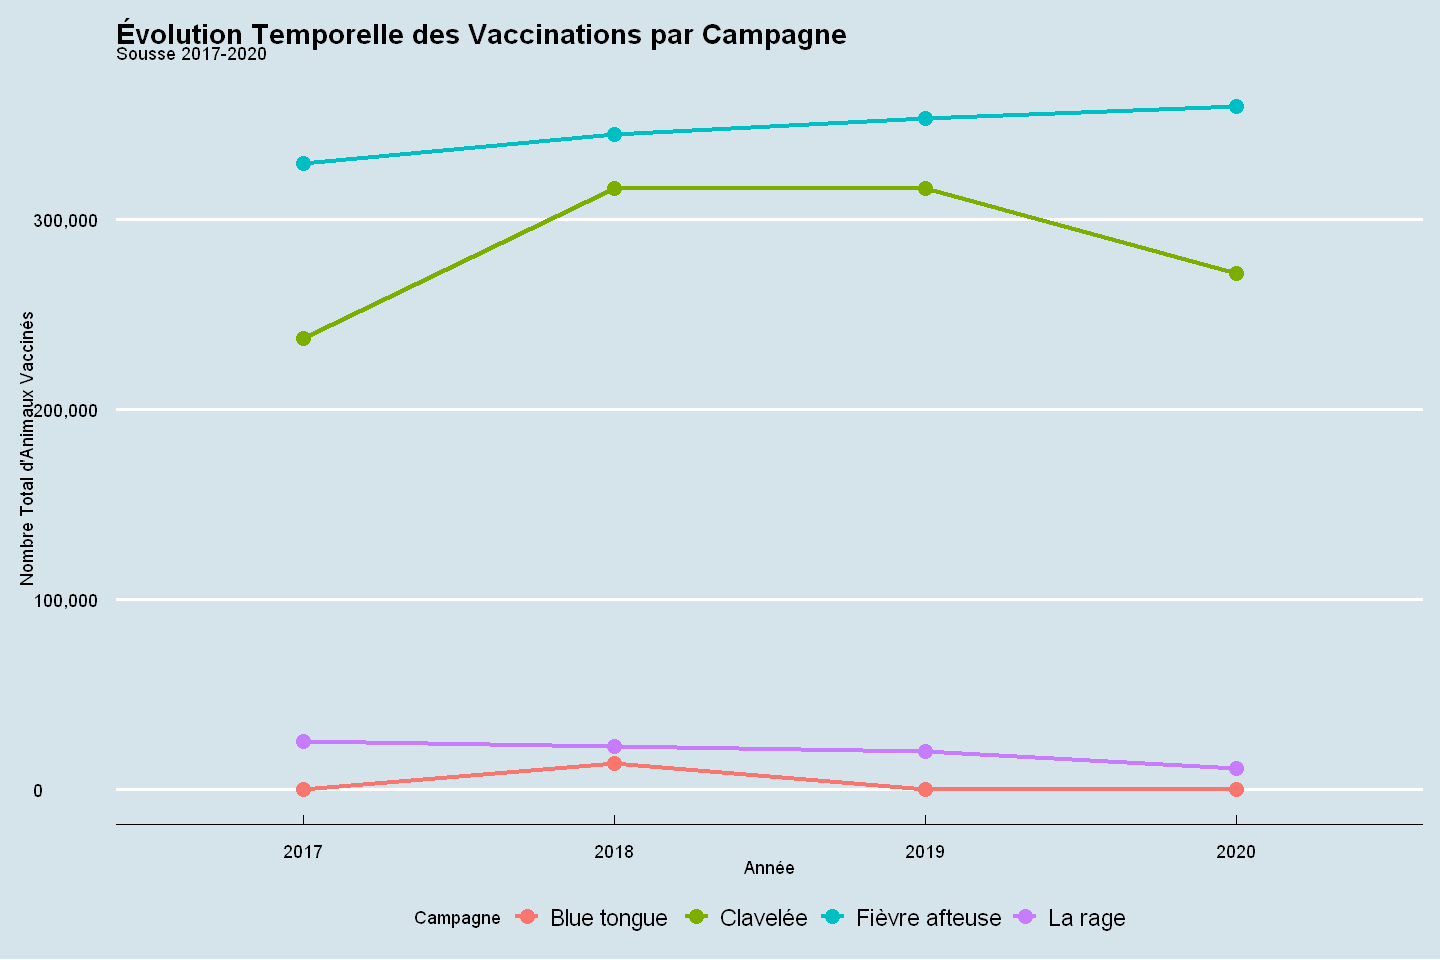

In [26]:
 

# --- GRAPHIQUE 1 : Courbe d'évolution temporelle ---
print("GRAPHIQUE 1 : Line Chart (Courbe d'évolution)\n")
print("Objectif : Visualiser l'évolution du nombre total de vaccinations par campagne sur 4 ans\n")
print("Type : Line plot avec points\n\n")

g1 <- data_clean %>%
  group_by(annee, Campagne_de_vaccination) %>%
  summarise(total_vaccines = sum(nombre_animaux_vaccines), .groups = 'drop') %>%
  ggplot(aes(x = annee, y = total_vaccines, color = Campagne_de_vaccination, group = Campagne_de_vaccination)) +
  geom_line(linewidth = 1.3) +
  geom_point(size = 4) +
  scale_y_continuous(labels = comma) +
  labs(
    title = "Évolution Temporelle des Vaccinations par Campagne",
    subtitle = "Sousse 2017-2020",
    x = "Année",
    y = "Nombre Total d'Animaux Vaccinés",
    color = "Campagne"
  ) +
  theme_economist() +
  theme(legend.position = "bottom")
options(repr.plot.width = 12, repr.plot.height = 8)
print(g1)

[1] "\n\nGRAPHIQUE 2 : Horizontal Bar Chart (Barres horizontales)\n"
[1] "Objectif : Comparer les taux de couverture moyens par espèce animale\n"
[1] "Type : Horizontal bar plot\n\n"


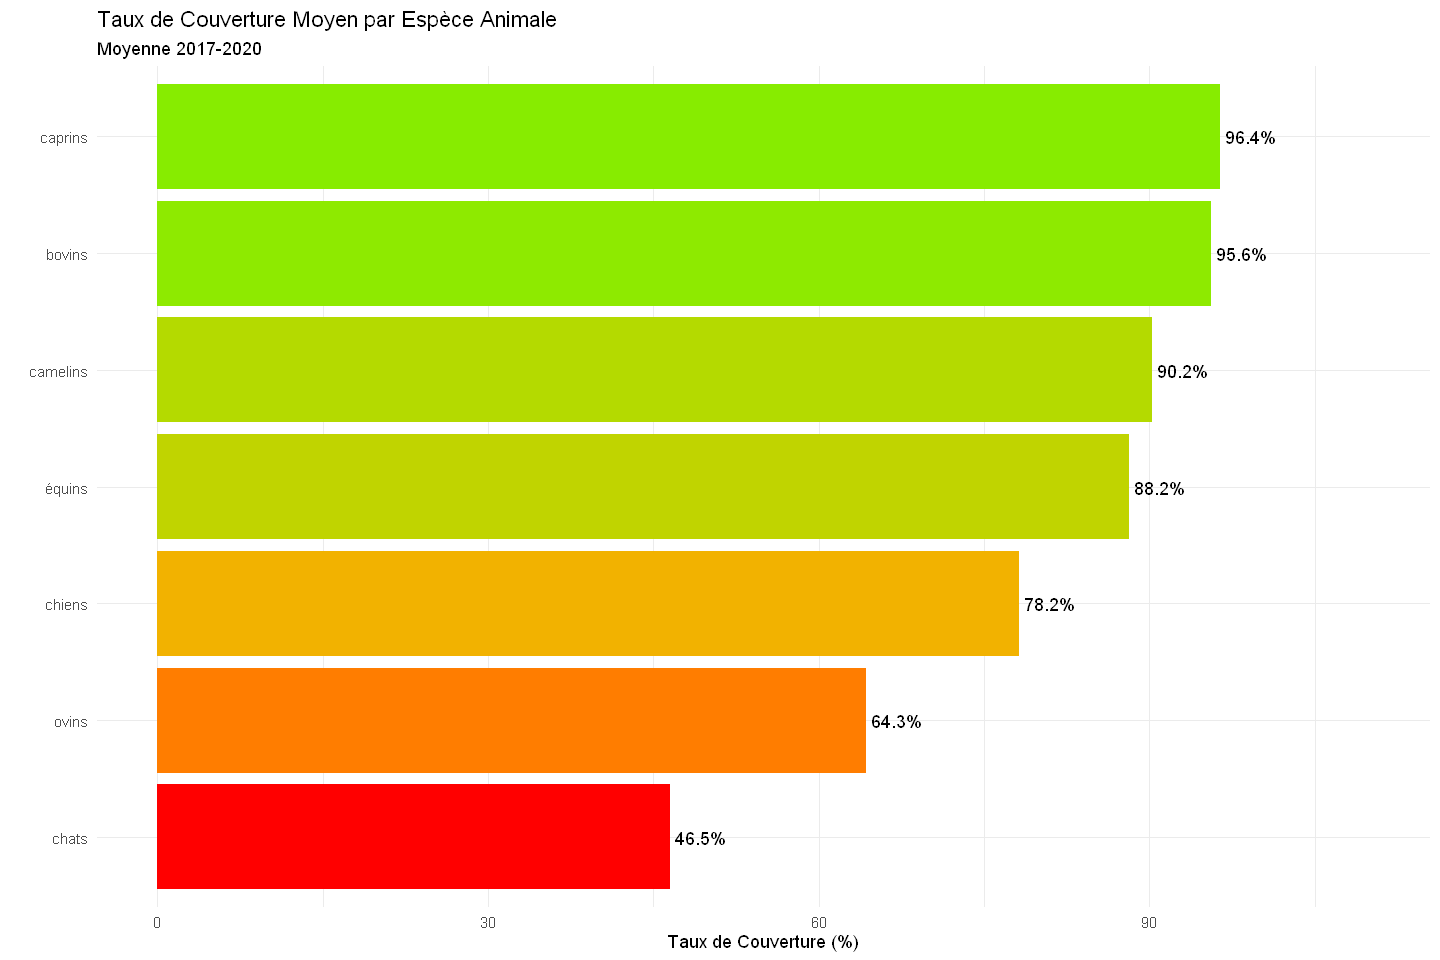

In [27]:
# --- GRAPHIQUE 2 : Barres horizontales ---
print("\n\nGRAPHIQUE 2 : Horizontal Bar Chart (Barres horizontales)\n")
print("Objectif : Comparer les taux de couverture moyens par espèce animale\n")
print("Type : Horizontal bar plot\n\n")

g2 <- data_clean %>%
  group_by(Espece_animale) %>%
  summarise(taux_moyen = mean(`taux_de_ couverture`, na.rm = TRUE)) %>%
  arrange(taux_moyen) %>%
  mutate(Espece_animale = fct_reorder(Espece_animale, taux_moyen)) %>%
  ggplot(aes(x = taux_moyen, y = Espece_animale, fill = taux_moyen)) +
  geom_col() +
  scale_fill_gradient2(low = "red", mid = "orange", high = "green", midpoint = 75) +
  geom_text(aes(label = sprintf("%.1f%%", taux_moyen)), hjust = -0.1) +
  labs(
    title = "Taux de Couverture Moyen par Espèce Animale",
    subtitle = "Moyenne 2017-2020",
    x = "Taux de Couverture (%)",
    y = ""
  ) +
  theme_minimal() +
  theme(legend.position = "none") +
  xlim(0, 110)
print(g2)



GRAPHIQUE 3 : Heatmap (Carte thermique)
Objectif : Visualiser les taux de couverture par année et espèce pour chaque campagne
Type : Heatmap avec gradient de couleurs



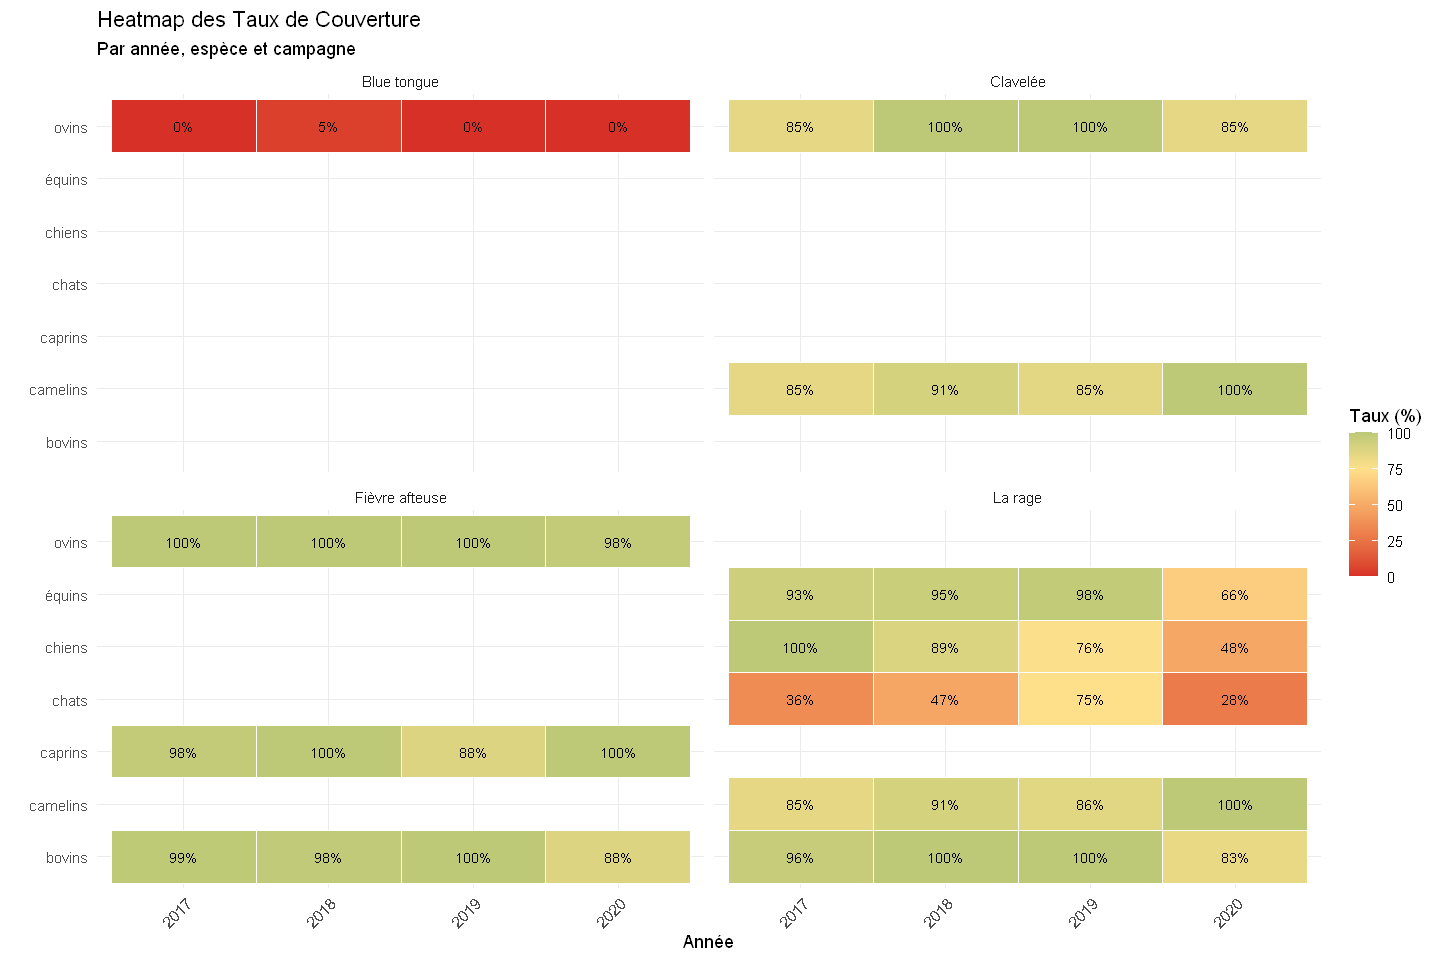

In [63]:
# --- GRAPHIQUE 3 : Heatmap ---
cat("\n\nGRAPHIQUE 3 : Heatmap (Carte thermique)\n")
cat("Objectif : Visualiser les taux de couverture par année et espèce pour chaque campagne\n")
cat("Type : Heatmap avec gradient de couleurs\n\n")

g5 <- data_clean %>%
  ggplot(aes(x = annee, y = Espece_animale, fill = `taux_de_ couverture`)) +
  geom_tile(color = "white", size = 0.5) +
  geom_text(aes(label = sprintf("%.0f%%", `taux_de_ couverture`)), size = 3) +
  scale_fill_gradient2(low = "#d73027", mid = "#fee08b", high = "#1a9850",
                       midpoint = 75, limits = c(0, 100)) +
  facet_wrap(~Campagne_de_vaccination, ncol = 2) +
  labs(
    title = "Heatmap des Taux de Couverture",
    subtitle = "Par année, espèce et campagne",
    x = "Année",
    y = "",
    fill = "Taux (%)"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
print(g5)



GRAPHIQUE 4 : Stacked Bar Chart (Barres empilées)
Objectif : Comparer les proportions d'animaux vaccinés par campagne et par année
Type : Stacked bar chart



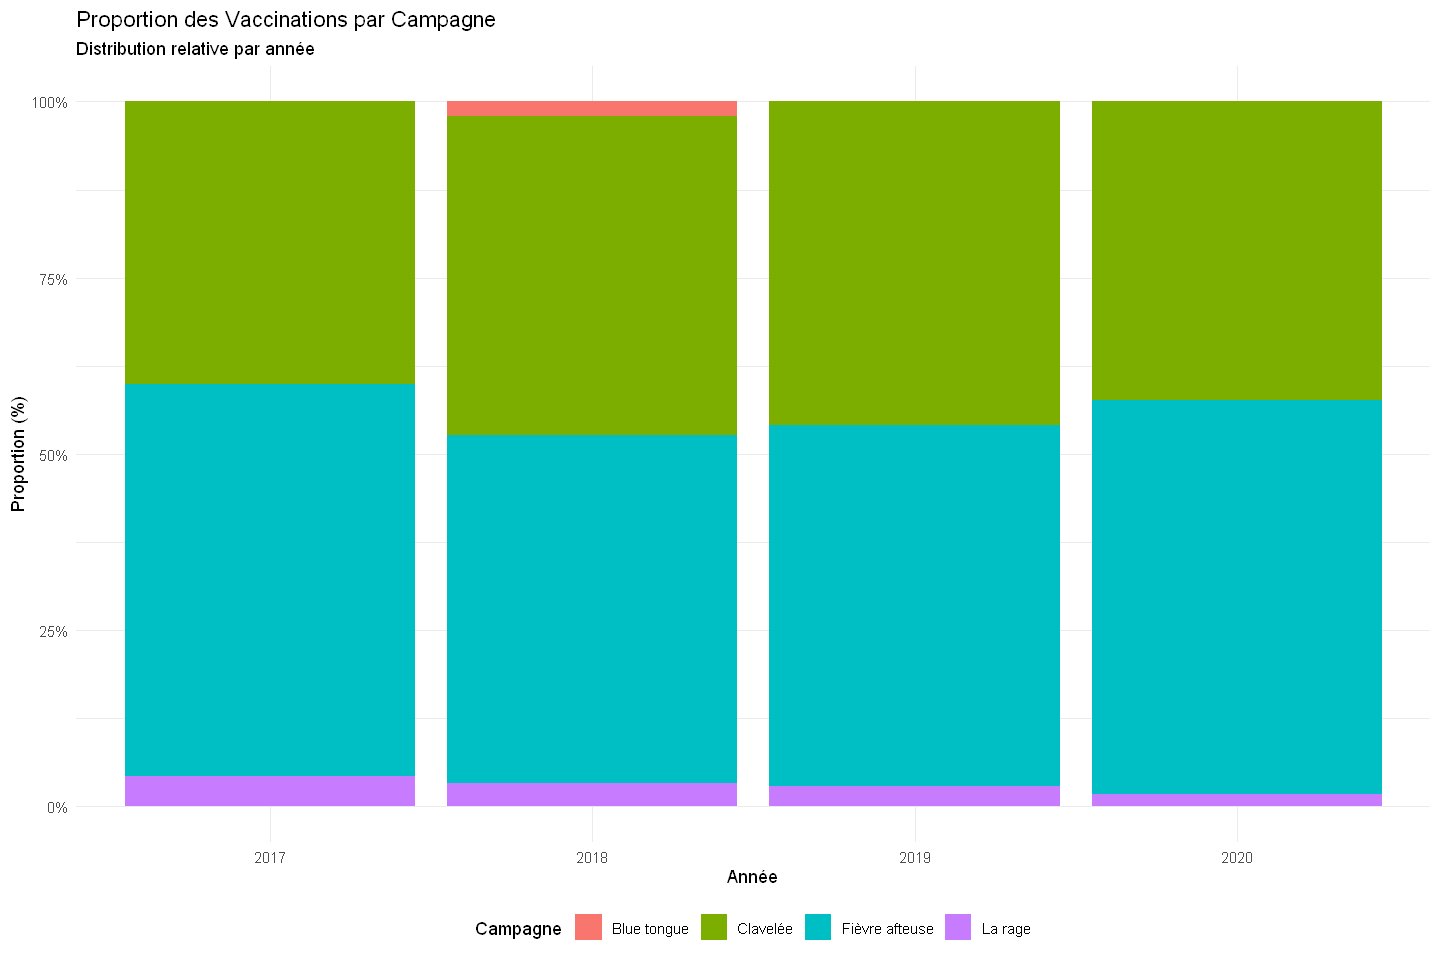

In [64]:
# --- GRAPHIQUE 4 : Stacked Bar Chart ---
cat("\n\nGRAPHIQUE 4 : Stacked Bar Chart (Barres empilées)\n")
cat("Objectif : Comparer les proportions d'animaux vaccinés par campagne et par année\n")
cat("Type : Stacked bar chart\n\n")

g6 <- data_clean %>%
  group_by(annee, Campagne_de_vaccination) %>%
  summarise(total = sum(nombre_animaux_vaccines), .groups = 'drop') %>%
  ggplot(aes(x = annee, y = total, fill = Campagne_de_vaccination)) +
  geom_col(position = "fill") +
  scale_y_continuous(labels = percent) +
  labs(
    title = "Proportion des Vaccinations par Campagne",
    subtitle = "Distribution relative par année",
    x = "Année",
    y = "Proportion (%)",
    fill = "Campagne"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom")
print(g6)



GRAPHIQUE 5 : Grouped Bar Chart (Barres groupées)
Objectif : Comparer objectifs vs réalisations pour chaque année
Type : Grouped bar chart



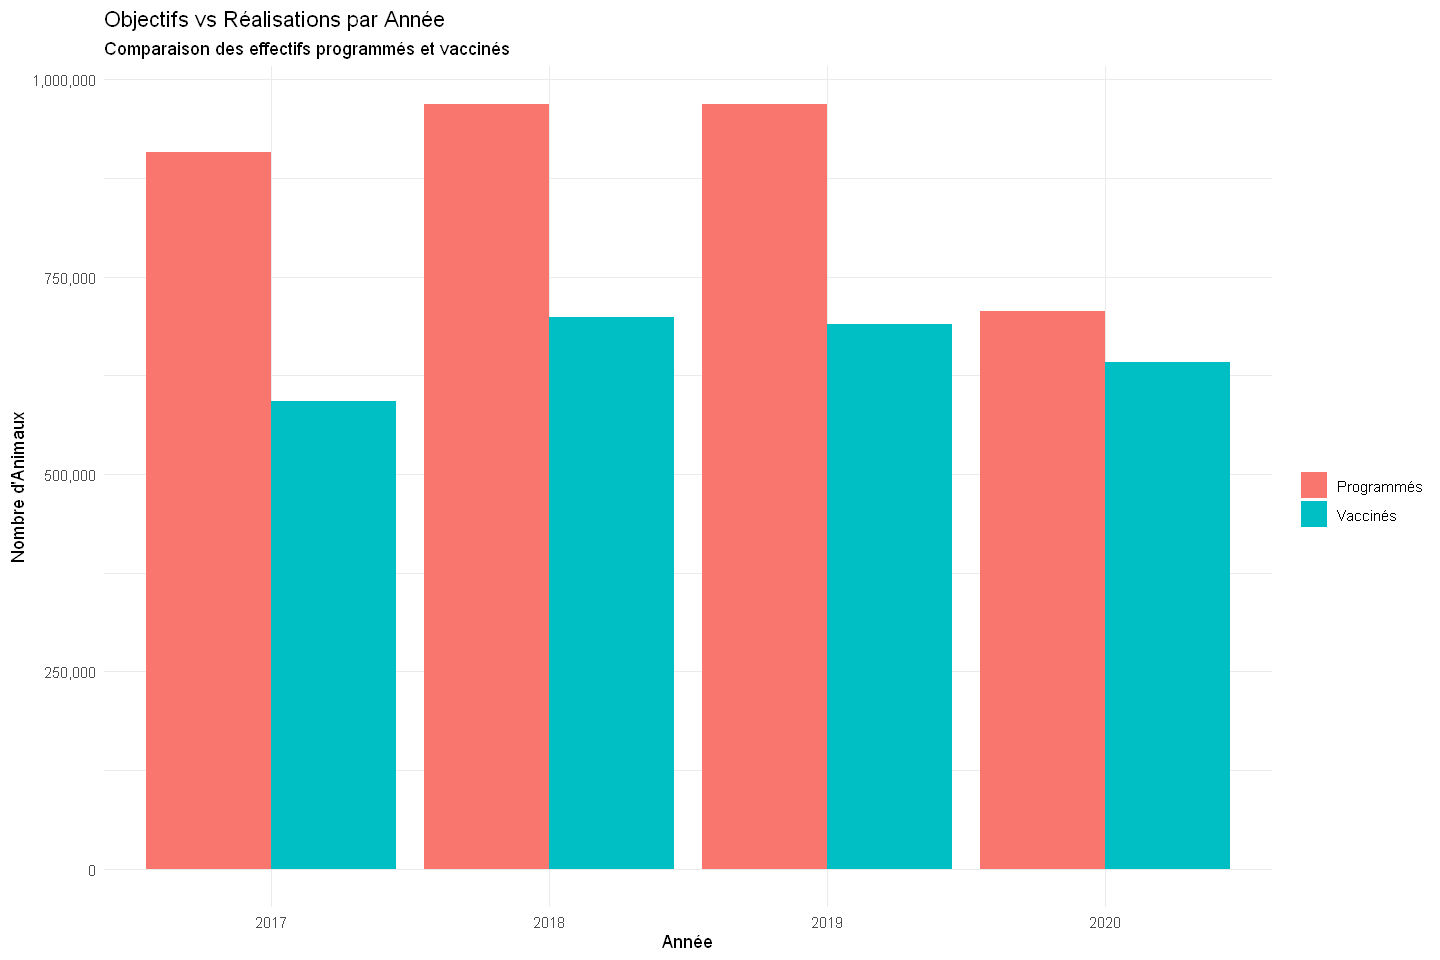

In [65]:
# --- GRAPHIQUE 5 : Grouped Bar Chart ---
cat("\n\nGRAPHIQUE 5 : Grouped Bar Chart (Barres groupées)\n")
cat("Objectif : Comparer objectifs vs réalisations pour chaque année\n")
cat("Type : Grouped bar chart\n\n")

g7 <- data_clean %>%
  group_by(annee) %>%
  summarise(
    Programmés = sum(nombre_animaux_programmes),
    Vaccinés = sum(nombre_animaux_vaccines)
  ) %>%
  pivot_longer(cols = c(Programmés, Vaccinés), names_to = "Type", values_to = "Nombre") %>%
  ggplot(aes(x = annee, y = Nombre, fill = Type)) +
  geom_col(position = "dodge") +
  scale_y_continuous(labels = comma) +
  labs(
    title = "Objectifs vs Réalisations par Année",
    subtitle = "Comparaison des effectifs programmés et vaccinés",
    x = "Année",
    y = "Nombre d'Animaux",
    fill = ""
  ) +
  theme_minimal()
print(g7)

# SECTION 4 : QUESTIONS D'ANALYSE STATISTIQUE

In [66]:
# --- QUESTION 1 : Les taux de couverture diffèrent-ils significativement entre les années ---

cat("QUESTION 1 : Les taux de couverture diffèrent-ils significativement entre les années ?\n")

cat("Hypothèse H0 : Les moyennes des taux sont égales pour toutes les années\n")
cat("Hypothèse H1 : Au moins une année diffère des autres\n\n")

anova_model <- aov(`taux_de_ couverture` ~ annee, data = data_clean)
anova_summary <- summary(anova_model)
print(anova_summary)

cat("\nMoyennes par année :\n")
moyennes_annee <- data_clean %>%
  group_by(annee) %>%
  summarise(taux_moyen = mean(`taux_de_ couverture`, na.rm = TRUE))
print(moyennes_annee)
cat("\nTest post-hoc de Tukey (comparaisons multiples) :\n")
tukey_result <- TukeyHSD(anova_model)
print(tukey_result)

cat("\nInterprétation :\n")
p_value_anova <- anova_summary[[1]]$`Pr(>F)`[1]
if(p_value_anova < 0.05) {
  cat("✓ p-value =", round(p_value_anova, 4), "< 0.05\n")
  cat("✓ Il existe des différences significatives entre les années\n")
} else {
  cat("✗ p-value =", round(p_value_anova, 4), "> 0.05\n")
  cat("✗ Pas de différence significative entre les années\n")
}

QUESTION 1 : Les taux de couverture diffèrent-ils significativement entre les années ?
Hypothèse H0 : Les moyennes des taux sont égales pour toutes les années
Hypothèse H1 : Au moins une année diffère des autres

            Df Sum Sq Mean Sq F value Pr(>F)
annee        3    820   273.3   0.279   0.84
Residuals   40  39166   979.2               

Moyennes par année :
# A tibble: 4 × 2
  annee taux_moyen
  <fct>      <dbl>
1 2017        79.7
2 2018        83.2
3 2019        82.5
4 2020        72.3

Test post-hoc de Tukey (comparaisons multiples) :
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = `taux_de_ couverture` ~ annee, data = data_clean)

$annee
                 diff       lwr      upr     p adj
2018-2017   3.5678766 -32.19633 39.33209 0.9932027
2019-2017   2.8835975 -32.88061 38.64781 0.9963757
2020-2017  -7.3268563 -43.09107 28.43735 0.9462473
2019-2018  -0.6842791 -36.44849 35.07993 0.9999507
2020-2018 -10.8947329 -46.65894 24.8694

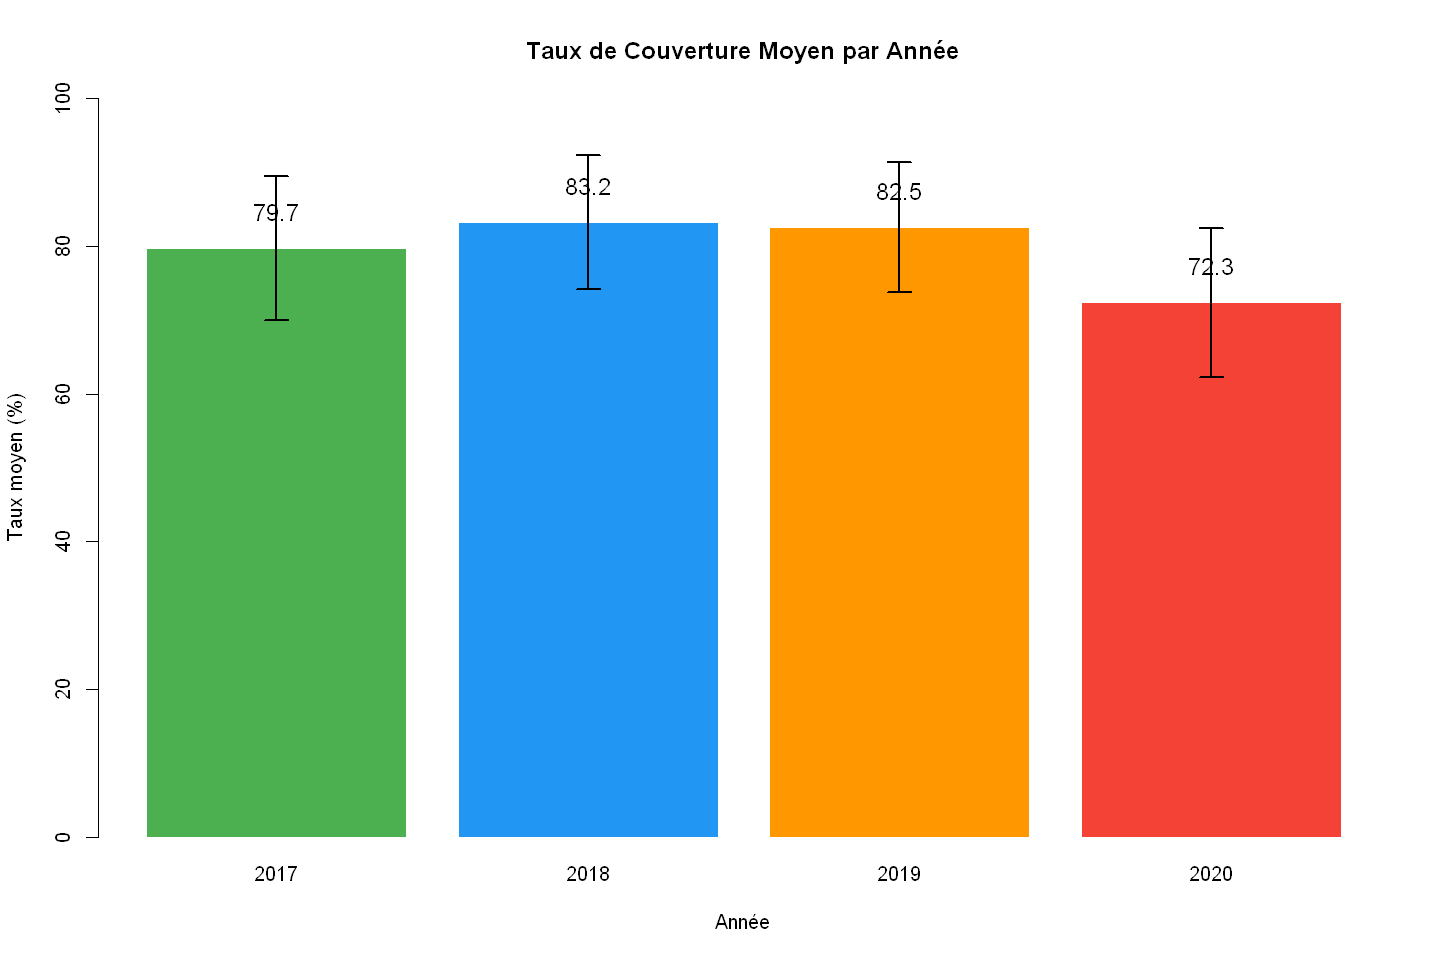

In [49]:
# Graphique : Barplot des moyennes avec barres d'erreur
moyennes_plot <- data_clean %>%
  group_by(annee) %>%
  summarise(
    moyenne = mean(`taux_de_ couverture`, na.rm = TRUE),
    sd = sd(`taux_de_ couverture`, na.rm = TRUE),
    n = n()
  ) %>%
  mutate(se = sd / sqrt(n))

barplot_heights <- barplot(moyennes_plot$moyenne,
                           names.arg = moyennes_plot$annee,
                           ylim = c(0, 100),
                           col = c("#4CAF50", "#2196F3", "#FF9800", "#F44336"),
                           main = "Taux de Couverture Moyen par Année",
                           xlab = "Année",
                           ylab = "Taux moyen (%)",
                           border = "white")
arrows(x0 = barplot_heights,
       y0 = moyennes_plot$moyenne - moyennes_plot$se,
       x1 = barplot_heights,
       y1 = moyennes_plot$moyenne + moyennes_plot$se,
       angle = 90, code = 3, length = 0.1, lwd = 2)
text(barplot_heights, moyennes_plot$moyenne + 5,
     labels = round(moyennes_plot$moyenne, 1), cex = 1.2)


In [67]:
# --- QUESTION 2 : Le taux de couverture a-t-il changé entre 2017 et 2020 ? --- 

print("QUESTION 2 : Le taux de couverture a-t-il changé entre 2017 et 2020 ?\n") 

print("Test utilisé : Test t de Student (échantillons indépendants)\n")
print("Hypothèse H0 : Moyenne 2017 = Moyenne 2020\n")
print("Hypothèse H1 : Moyenne 2017 ≠ Moyenne 2020\n\n")

data_2017 <- filter(data_clean, annee == "2017")
data_2020 <- filter(data_clean, annee == "2020")

t_test_result <- t.test(data_2017$`taux_de_ couverture`, data_2020$`taux_de_ couverture`)
print(t_test_result)

print("\nStatistiques descriptives :\n")
print(paste0("Moyenne 2017 :", round(mean(data_2017$`taux_de_ couverture`), 2), "%\n"))
print(paste0("Moyenne 2020 :", round(mean(data_2020$`taux_de_ couverture`), 2), "%\n"))
print(paste0("Différence :", round(mean(data_2020$`taux_de_ couverture`) - mean(data_2017$`taux_de_ couverture`), 2), "%\n"))

print("\nInterprétation :\n")
if(t_test_result$p.value < 0.05) {
  print(paste0("✓ p-value =", round(t_test_result$p.value, 4), "< 0.05\n"))
  print("✓ Différence significative entre 2017 et 2020\n")
} else {
  print(paste0("✗ p-value =", round(t_test_result$p.value, 4), "> 0.05\n"))
  print("✗ Pas de différence significative entre 2017 et 2020\n")
}

[1] "QUESTION 2 : Le taux de couverture a-t-il changé entre 2017 et 2020 ?\n"
[1] "Test utilisé : Test t de Student (échantillons indépendants)\n"
[1] "Hypothèse H0 : Moyenne 2017 = Moyenne 2020\n"


[1] "Hypothèse H1 : Moyenne 2017 ≠ Moyenne 2020\n\n"

	Welch Two Sample t-test

data:  data_2017$`taux_de_ couverture` and data_2020$`taux_de_ couverture`
t = 0.52222, df = 19.965, p-value = 0.6073
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -21.94322  36.59694
sample estimates:
mean of x mean of y 
 79.66186  72.33500 

[1] "\nStatistiques descriptives :\n"
[1] "Moyenne 2017 :79.66%\n"
[1] "Moyenne 2020 :72.34%\n"
[1] "Différence :-7.33%\n"
[1] "\nInterprétation :\n"
[1] "✗ p-value =0.6073> 0.05\n"
[1] "✗ Pas de différence significative entre 2017 et 2020\n"


Warning message in (function (z, notch = FALSE, width = NULL, varwidth = FALSE, :
"quelques indentations ("notches") dépassent des jointures ("hinges") ('box') : utilisez peut-être notch=FALSE"


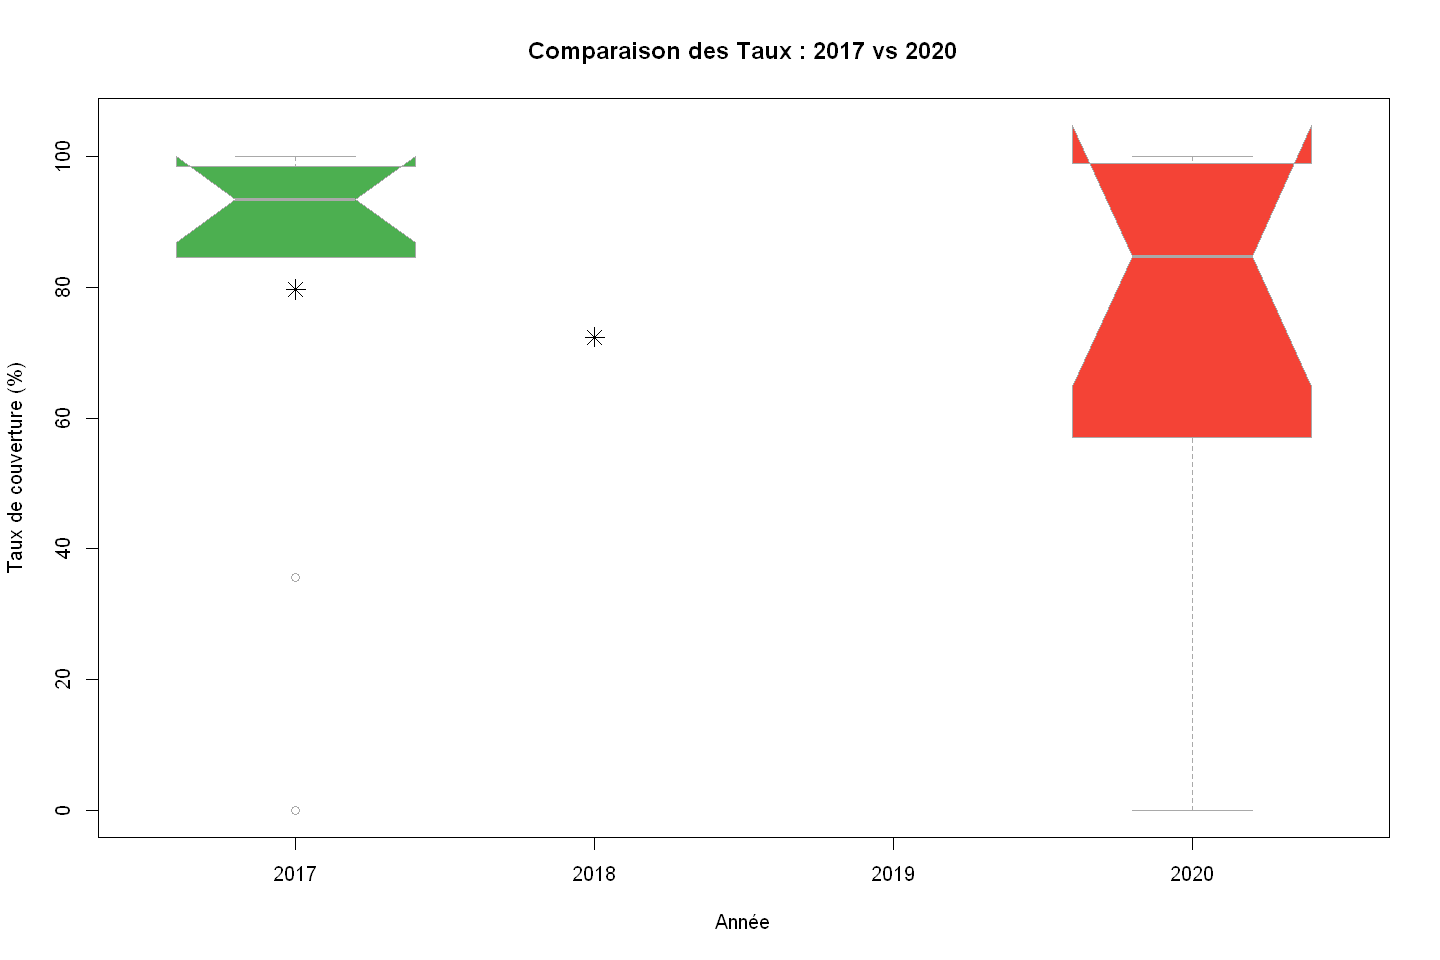

In [55]:
# Graphique : Boxplot comparatif 2017 vs 2020
data_2017_2020 <- data_clean %>% filter(annee %in% c("2017", "2020"))
boxplot(`taux_de_ couverture` ~ annee, data = data_2017_2020,
        col = c("#4CAF50", "#F44336"),
        main = "Comparaison des Taux : 2017 vs 2020",
        ylab = "Taux de couverture (%)",
        xlab = "Année",
        border = "darkgray",
        notch = TRUE)
points(x = 1, y = mean(data_2017$`taux_de_ couverture`), pch = 8, col = "black", cex = 1.5)
points(x = 2, y = mean(data_2020$`taux_de_ couverture`), pch = 8, col = "black", cex = 1.5)

QUESTION 3 : Peut-on prédire le nombre de vaccinés à partir du nombre programmé ?
Modèle : Régression linéaire simple
Équation : Vaccinés = β0 + β1 × Programmés + ε


Call:
lm(formula = nombre_animaux_vaccines ~ nombre_animaux_programmes, 
    data = data_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-218759    -992    -952    5880   97339 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               1.043e+03  1.182e+04   0.088     0.93    
nombre_animaux_programmes 7.257e-01  7.898e-02   9.188 1.32e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 66070 on 42 degrees of freedom
Multiple R-squared:  0.6678,	Adjusted R-squared:  0.6599 
F-statistic: 84.43 on 1 and 42 DF,  p-value: 1.319e-11


Interprétation :
✓ R² = 0.6678 → 66.8 % de la variance expliquée
✓ Coefficient β1 = 0.7257 
  → Pour chaque animal programmé supplémentaire, on vaccine environ 0.73 animaux
✓ Le modèle 

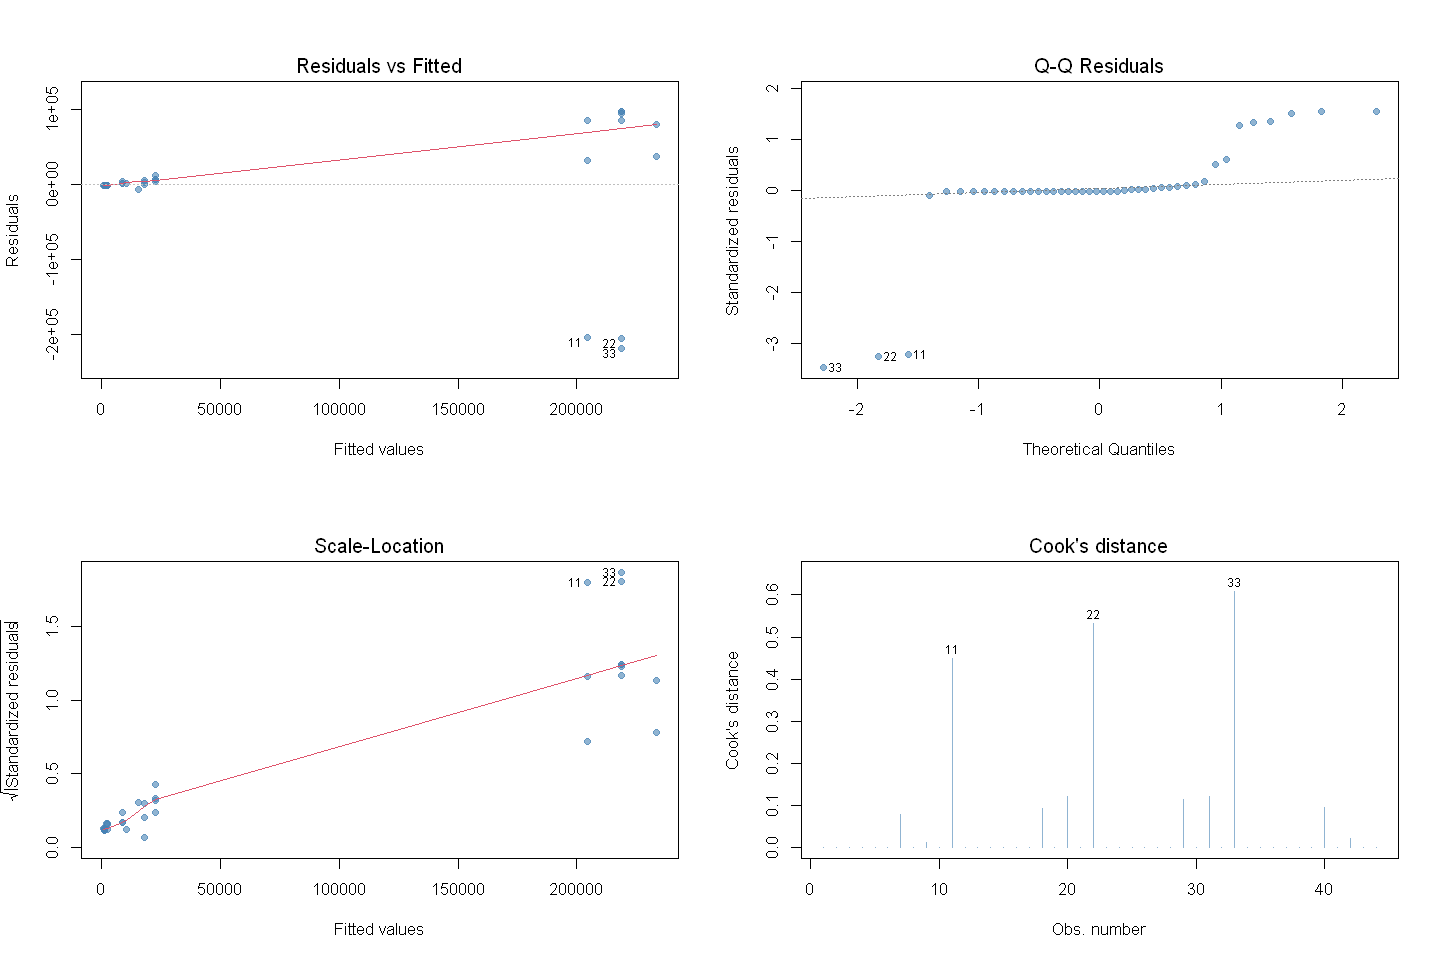

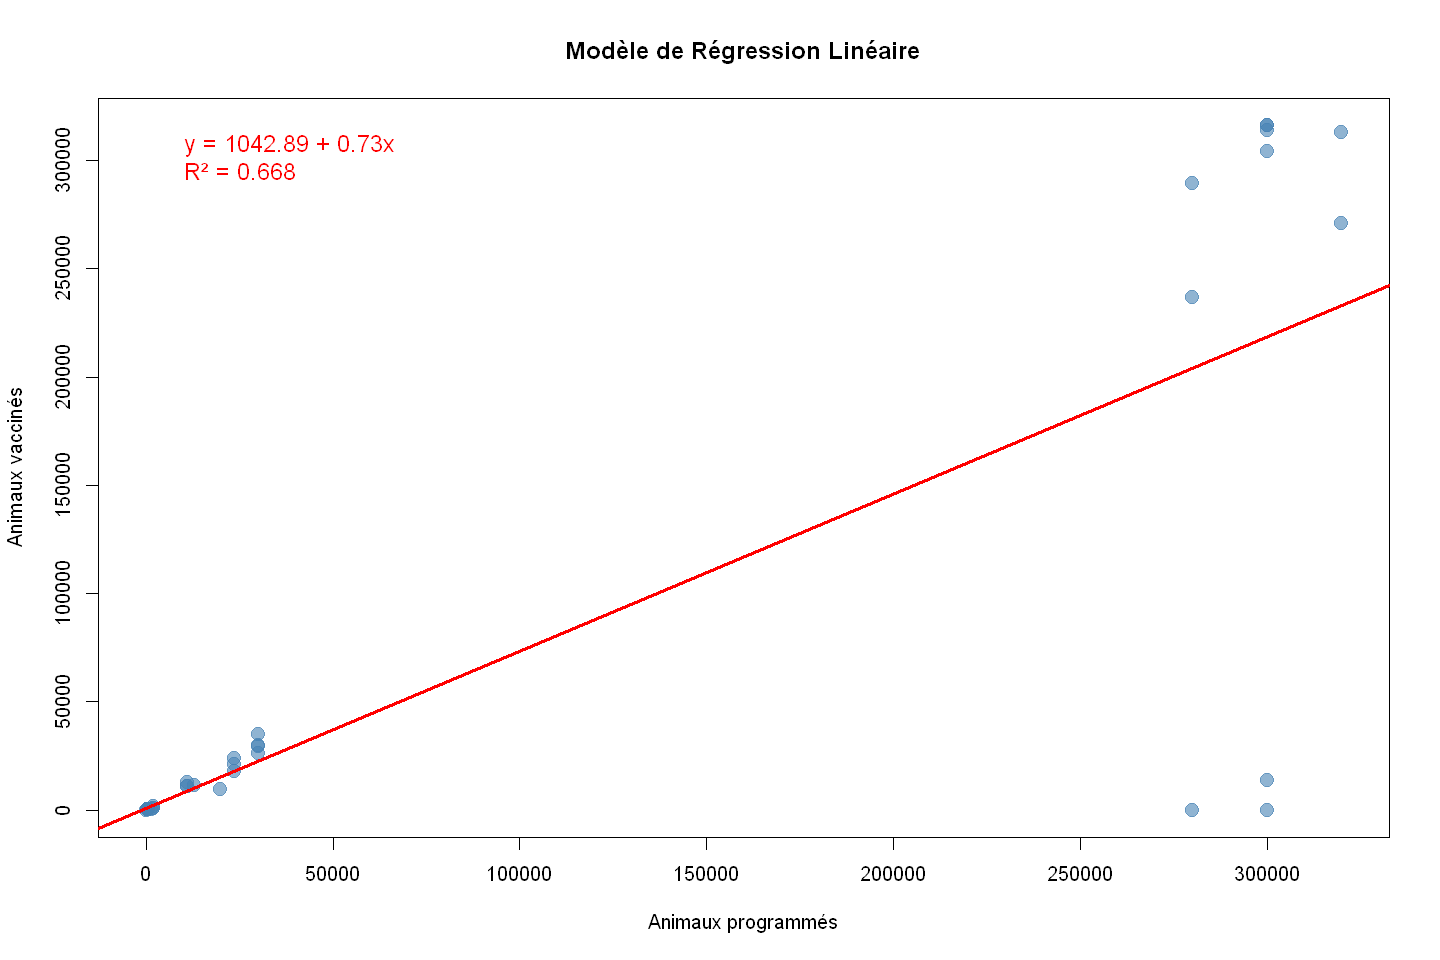

In [68]:
# --- QUESTION 3 : Régression linéaire simple ---
 
cat("QUESTION 3 : Peut-on prédire le nombre de vaccinés à partir du nombre programmé ?\n") 

cat("Modèle : Régression linéaire simple\n")
cat("Équation : Vaccinés = β0 + β1 × Programmés + ε\n\n")

modele_simple <- lm(nombre_animaux_vaccines ~ nombre_animaux_programmes,
                    data = data_clean)
print(summary(modele_simple))

cat("\nInterprétation :\n")
r2 <- summary(modele_simple)$r.squared
cat("✓ R² =", round(r2, 4), "→", round(r2*100, 1), "% de la variance expliquée\n")
cat("✓ Coefficient β1 =", round(coef(modele_simple)[2], 4), "\n")
cat("  → Pour chaque animal programmé supplémentaire, on vaccine environ",
    round(coef(modele_simple)[2], 2), "animaux\n")

if(summary(modele_simple)$coefficients[2, 4] < 0.05) {
  cat("✓ Le modèle est statistiquement significatif (p < 0.05)\n")
}

# Graphique : Régression avec résidus
par(mfrow = c(2, 2))
plot(modele_simple, which = 1:4, pch = 19, col = alpha("steelblue", 0.6))
par(mfrow = c(1, 1))

# Graphique détaillé de la régression
plot(data_clean$nombre_animaux_programmes, data_clean$nombre_animaux_vaccines,
     pch = 19, col = alpha("steelblue", 0.6), cex = 1.5,
     main = "Modèle de Régression Linéaire",
     xlab = "Animaux programmés",
     ylab = "Animaux vaccinés")
abline(modele_simple, col = "red", lwd = 3)
equation_text <- paste0("y = ", round(coef(modele_simple)[1], 2),
                       " + ", round(coef(modele_simple)[2], 2), "x\n",
                       "R² = ", round(summary(modele_simple)$r.squared, 3))
legend("topleft", legend = equation_text, bty = "n", cex = 1.2, text.col = "red")


# SECTION 5 : CONCLUSION

In [75]:

cat("SYNTHÈSE DES RÉSULTATS PRINCIPAUX :\n\n")

cat("1. TAUX DE COUVERTURE GLOBAUX\n")
cat("   • Taux moyen 2017-2020 :", round(mean(data_clean$`taux_de_ couverture`, na.rm=TRUE), 1), " %\n")
cat("   • Meilleure année : 2018 (", round(mean(filter(data_clean, annee=="2018")$`taux_de_ couverture`), 1), " %)\n")
cat("   • Année la plus faible : 2020 (", round(mean(filter(data_clean, annee=="2020")$`taux_de_ couverture`), 1), " %)\n")
cat("   • Impact COVID-19 visible en 2020 avec baisse significative\n\n")

SYNTHÈSE DES RÉSULTATS PRINCIPAUX :

1. TAUX DE COUVERTURE GLOBAUX
   • Taux moyen 2017-2020 : 79.4  %
   • Meilleure année : 2018 ( 83.2  %)
   • Année la plus faible : 2020 ( 72.3  %)
   • Impact COVID-19 visible en 2020 avec baisse significative



In [74]:
print("2. PERFORMANCES PAR CAMPAGNE")
perf_campagne <- data_clean %>%
  group_by(Campagne_de_vaccination) %>%
  summarise(
    taux_moyen = mean(`taux_de_ couverture`, na.rm=TRUE),
    nb_observations = n()
  ) %>%
  arrange(desc(taux_moyen))

print(perf_campagne)

[1] "2. PERFORMANCES PAR CAMPAGNE"


# A tibble: 4 × 3
  Campagne_de_vaccination taux_moyen nb_observations
  <fct>                        <dbl>           <int>
1 Fièvre afteuse               97.4               12
2 Clavelée                     91.2                8
3 La rage                      79.6               20
4 Blue tongue                   1.16               4


In [73]:
print("3. PERFORMANCES PAR ESPÈCE")
perf_espece <- data_clean %>%
  group_by(Espece_animale) %>%
  summarise(
    taux_moyen = mean(`taux_de_ couverture`, na.rm=TRUE),
    nb_campagnes = n()
  ) %>%
  arrange(desc(taux_moyen))

print(perf_espece)

[1] "3. PERFORMANCES PAR ESPÈCE"


# A tibble: 7 × 3
  Espece_animale taux_moyen nb_campagnes
  <fct>               <dbl>        <int>
1 caprins              96.4            4
2 bovins               95.6            8
3 camelins             90.2            8
4 équins               88.2            4
5 chiens               78.2            4
6 ovins                64.3           12
7 chats                46.5            4
